In [1]:
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score 


In [7]:
import numpy as np
from sklearn.datasets import load_iris


iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(iris.data, 
                            iris.target,
                            test_size=0.2)

train_data, test_data, train_labels, test_labels = datasets

In [9]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42,
               max_iter=30,
               tol=0.001)
p.fit(train_data, train_labels)

Perceptron(max_iter=30, random_state=42)

In [10]:
import random


sample = random.sample(range(len(train_data)), 10)
for i in sample:
    print(i, p.predict([train_data[i]]))

16 [2]
81 [0]
99 [0]
43 [0]
15 [2]
64 [0]
59 [0]
14 [0]
36 [0]
63 [2]


In [11]:
from sklearn.metrics import classification_report

print(classification_report(p.predict(train_data), train_labels))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        73
           1       0.00      0.00      0.00         0
           2       1.00      0.83      0.91        47

    accuracy                           0.68       120
   macro avg       0.67      0.47      0.55       120
weighted avg       1.00      0.68      0.80       120



C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
from sklearn.metrics import classification_report

print(classification_report(p.predict(test_data), test_labels))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73        14
           1       0.00      0.00      0.00         0
           2       1.00      0.69      0.81        16

    accuracy                           0.63        30
   macro avg       0.67      0.42      0.51        30
weighted avg       1.00      0.63      0.77        30



C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
############################################Perceptron_Trick####################################################

In [14]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

In [15]:
import matplotlib.pyplot as plt

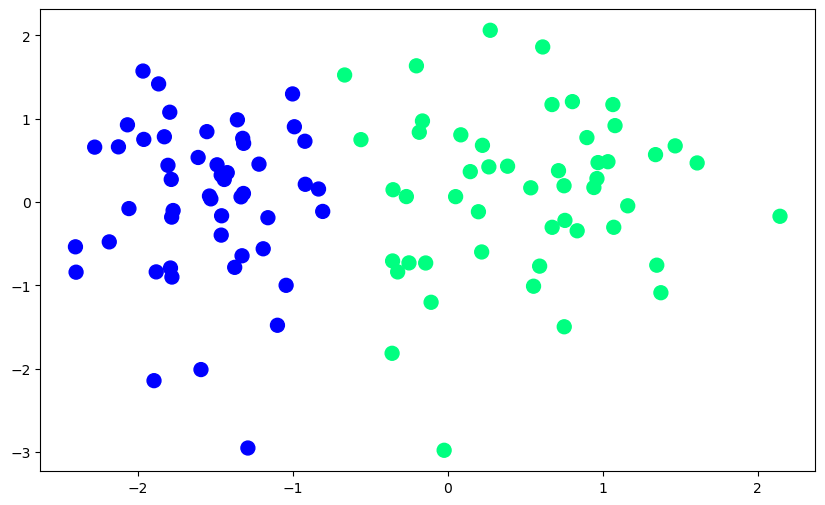

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [17]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [18]:
def step(z):
    return 1 if z>0 else 0

In [19]:
intercept_,coef_ = perceptron(X,y)

In [20]:
print(coef_)
print(intercept_)

[1.36790951 0.12941815]
0.9


In [21]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [23]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

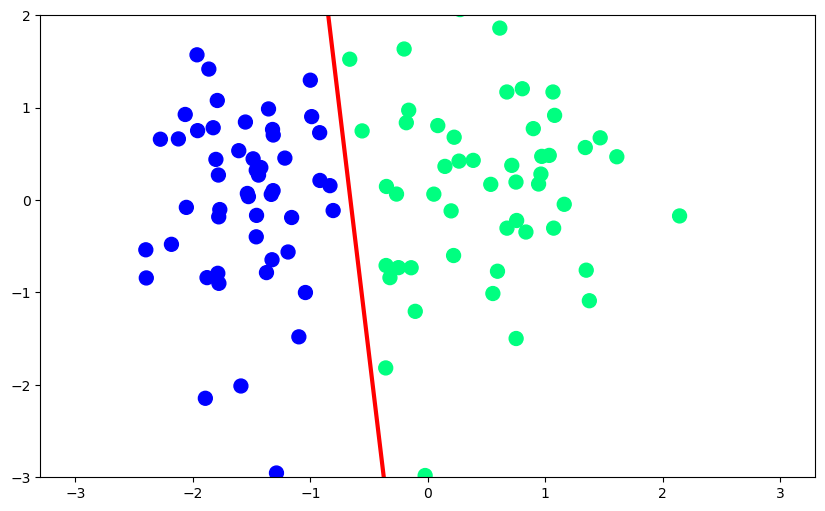

In [24]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)